# Reinforcement Learning - Toy examples with Gym

## FrozenLake - Deterministic

In [43]:
import gym
import sys
sys.path.append("../") # go to parent dir
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import pandas as pd
from auxModules.TD import *

from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery8x8-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '8x8', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

Error: Cannot re-register id: FrozenLakeNotSlippery8x8-v0

In [35]:
envName = "FrozenLakeNotSlippery-v0"
env = gym.make(envName)

### SARSA

Wall time: 341 ms


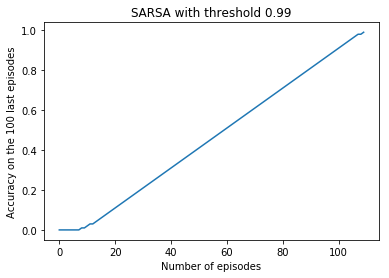

In [36]:
%%time
w = 100
threshold = 0.99
q_table, histAcc, episode = SARSATh(env, threshold, softmax = True, window=w, tau = 0.001)
plt.plot(np.arange(len(histAcc)), histAcc)

plt.xlabel("Number of episodes")
plt.ylabel("Accuracy on the {} last episodes".format(w))
plt.title("SARSA with threshold {}".format(threshold))

### $Q$-Learning

183
Wall time: 1.61 s


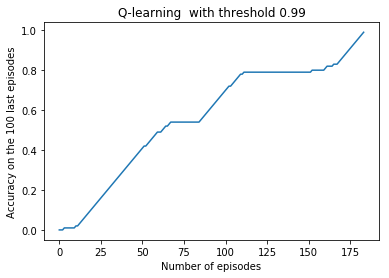

In [37]:
%%time
w = 100
threshold = 0.99
q_table, histAcc, episode = QLearningTh(env, threshold, softmax = True, window=w, tau = 0.01)
print(episode)
plt.plot(np.arange(len(histAcc)), histAcc)

plt.xlabel("Number of episodes")
plt.ylabel("Accuracy on the {} last episodes".format(w))
plt.title("Q-learning  with threshold {}".format(threshold))

In [38]:
%%time
print(testPolicy(env, q_table, nEpisode = 1))
print(np.argmax(q_table, axis = 1).reshape(4,4)) #(0: right, 1: down, 2: right, 3: up)

1.0
[[1 0 2 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]
Wall time: 9.99 ms


## Compare methods

In [39]:
recap = pd.DataFrame (columns = ["Accuracy - SARSA", "Nb episodes - SARSA", "Accuracy - QLearning", "Nb episodes - QLearning"])

nEpisodeAccuracy = 1
threshold = 0.98
nEpisodeMax = 2000

### $\epsilon$-greedy with fixed $\epsilon$

In [40]:
n = 5
Eps = 0.1 * np.arange(1, 10, 2)

for eps in tqdm(Eps):
    sarsa = 0
    sarsaEpisode = 0
    ql = 0
    qEpisode = 0
    for _ in range(n):
        q_table, histAcc, qEp = QLearningTh(env, threshold, epsilon0 = eps, decreaseRate=1)
        ql += testPolicy(env, q_table, nEpisodeAccuracy)
        qEpisode += qEp
        q_table, histAcc, sarsaEp  = SARSATh(env, threshold, epsilon0 = eps, decreaseRate=1)
        sarsa += testPolicy(env, q_table, nEpisodeAccuracy)
        sarsaEpisode += sarsaEp
    sarsa /= n
    sarsaEpisode /= n
    qEpisode /= n
    ql /= n
    recap.loc["Fixed $\epsilon$ : $\epsilon$ = {}".format(round(eps,2))] = [sarsa, sarsaEpisode, ql, qEpisode]




  0%|                                                                                                                                                          | 0/5 [00:00<?, ?it/s]


 20%|█████████████████████████████▏                                                                                                                    | 1/5 [00:10<00:42, 10.67s/it]


 40%|██████████████████████████████████████████████████████████▍                                                                                       | 2/5 [00:20<00:31, 10.38s/it]


 60%|███████████████████████████████████████████████████████████████████████████████████████▌                                                          | 3/5 [00:30<00:20, 10.37s/it]


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 4/5 [00:41<00:10, 10.56s/it]


100%|████████████████████████████████████████████████████████████████████████

In [19]:
recap

,Accuracy - SARSA,Nb episodes - SARSA,Accuracy - QLearning,Nb episodes - QLearning
Fixed $\epsilon$ : $\epsilon$ = 0.1,1.0,124.8,1.0,179.8
Fixed $\epsilon$ : $\epsilon$ = 0.3,0.8,133.0,1.0,201.0
Fixed $\epsilon$ : $\epsilon$ = 0.5,1.0,133.0,1.0,198.0
Fixed $\epsilon$ : $\epsilon$ = 0.7,0.8,120.2,1.0,197.2
Fixed $\epsilon$ : $\epsilon$ = 0.9,1.0,123.2,1.0,263.6


### $\epsilon$-greedy with decaying $\epsilon$

In [20]:
n = 5
DR = [0.9, 0.99, 0.999]
eps = 0.9

for dr in tqdm(DR):
    sarsa = 0
    sarsaEpisode = 0
    ql = 0
    qEpisode = 0
    for _ in range(n):
        q_table, histAcc, qEp = QLearningTh(env, threshold, epsilon0 = eps, decreaseRate=dr)
        ql += testPolicy(env, q_table, nEpisodeAccuracy)
        qEpisode += qEp
        q_table, histAcc, sarsaEp  = SARSATh(env, threshold, epsilon0 = eps, decreaseRate=dr)
        sarsa += testPolicy(env, q_table, nEpisodeAccuracy)
        sarsaEpisode += sarsaEp
    sarsa /= n
    sarsaEpisode /= n
    qEpisode /= n
    ql /= n
    recap.loc["Decaying-$\epsilon$ : decaying rate = {}".format(dr)] = [sarsa, sarsaEpisode, ql, qEpisode]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:34<00:00, 11.70s/it]


In [21]:
recap

,Accuracy - SARSA,Nb episodes - SARSA,Accuracy - QLearning,Nb episodes - QLearning
Fixed $\epsilon$ : $\epsilon$ = 0.1,1.0,124.8,1.0,179.8
Fixed $\epsilon$ : $\epsilon$ = 0.3,0.8,133.0,1.0,201.0
Fixed $\epsilon$ : $\epsilon$ = 0.5,1.0,133.0,1.0,198.0
Fixed $\epsilon$ : $\epsilon$ = 0.7,0.8,120.2,1.0,197.2
Fixed $\epsilon$ : $\epsilon$ = 0.9,1.0,123.2,1.0,263.6
Decaying-$\epsilon$ : decaying rate = 0.9,1.0,129.8,1.0,256.4
Decaying-$\epsilon$ : decaying rate = 0.99,1.0,128.4,1.0,219.8
Decaying-$\epsilon$ : decaying rate = 0.999,1.0,119.0,1.0,199.4


### Softmax

In [29]:
n = 5
Tau = [1, 0.1, 0.01, 0.001]

for t in tqdm(Tau):
    sarsa = 0
    sarsaEpisode = 0
    ql = 0
    qEpisode = 0
    for _ in range(n):
        q_table, histAcc, qEp = QLearningTh(env, threshold, nEpisodeMax = nEpisodeMax, softmax = True, tau = t)
        ql += testPolicy(env, q_table, nEpisodeAccuracy)
        qEpisode += qEp
        q_table, histAcc, sarsaEp  = SARSATh(env, threshold, nEpisodeMax = nEpisodeMax, softmax = True, tau = t)
        sarsa += testPolicy(env, q_table, nEpisodeAccuracy)
        sarsaEpisode += sarsaEp
    sarsa /= n
    sarsaEpisode /= n
    qEpisode /= n
    ql /= n
    recap.loc["Softmax : $\tau$ = {}".format(t)] = [sarsa, sarsaEpisode, ql, qEpisode]



  0%|                                                                                                                                                          | 0/4 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [30]:
recap

,Accuracy - SARSA,Nb episodes - SARSA,Accuracy - QLearning,Nb episodes - QLearning
Fixed $\epsilon$ : $\epsilon$ = 0.1,1.0,124.8,1.0,179.8
Fixed $\epsilon$ : $\epsilon$ = 0.3,0.8,133.0,1.0,201.0
Fixed $\epsilon$ : $\epsilon$ = 0.5,1.0,133.0,1.0,198.0
Fixed $\epsilon$ : $\epsilon$ = 0.7,0.8,120.2,1.0,197.2
Fixed $\epsilon$ : $\epsilon$ = 0.9,1.0,123.2,1.0,263.6
Decaying-$\epsilon$ : decaying rate = 0.9,1.0,129.8,1.0,256.4
Decaying-$\epsilon$ : decaying rate = 0.99,1.0,128.4,1.0,219.8
Decaying-$\epsilon$ : decaying rate = 0.999,1.0,119.0,1.0,199.4
Softmax : $\tau$ = 1,0.2,2000.0,1.0,2000.0
Softmax : $\tau$ = 0.1,0.6,1948.0,0.8,2000.0


In [27]:
recap.to_csv("output/recap_deterministic_" + envName + ".csv")